<a href="https://colab.research.google.com/github/GCGuillen/AiGoogleColab/blob/master/Hw2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2

Modify the network architecture in the notebook for classifying MNIST fashion items with dense layers and analyzing model performance by varying the number of hidden layers and choosing different sizes for the hidden layers.

Give three models consisting of only dense layers that

first model underfits (the model is too simple and cannot explain the data)
second model overfits (the model is unnecessarily complex so it can easily adapt too much to the training data)
third is pretty good (the model is either too simple, nor too complex; you don't train for too many epochs; you use dropout to fight overfitting)
Make sure that you plot the curves depicting the training/validation accuracy/loss.

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images_original, train_labels), (test_images_original, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
train_images_original.shape

(60000, 28, 28)

In [0]:
len(train_images_original)

60000

In [0]:
train_images_original.ndim

3

In [0]:
train_images_original.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

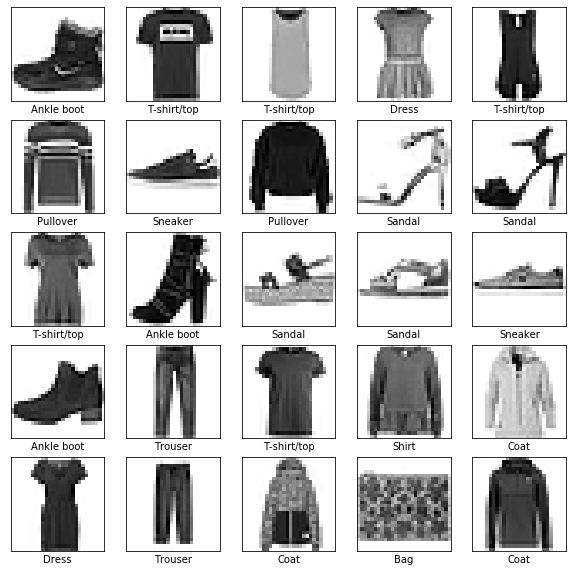

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_original[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

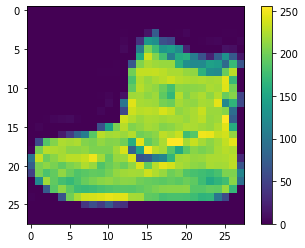

In [0]:
plt.figure()
plt.imshow(train_images_original[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images_original.reshape((60000, 28* 28)) / 255.0
test_images = test_images_original.reshape((10000, 28 *28)) / 255.0

In [0]:
train_images_original.shape

(60000, 28, 28)

In [0]:
train_images_original.dtype

dtype('uint8')

#This is for the over fit.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                250       
Total params: 56,210
Trainable params: 56,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.6229 - acc: 0.7788 - val_loss: 0.4544 - val_acc: 0.8355
Epoch 2/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4433 - acc: 0.8426 - val_loss: 0.4085 - val_acc: 0.8579
Epoch 3/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4012 - acc: 0.8569 - val_loss: 0.3723 - val_acc: 0.8622
Epoch 4/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3720 - acc: 0.8662 - val_loss: 0.3789 - val_acc: 0.8603
Epoch 5/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3525 - acc: 0.8730 - val_loss: 0.3749 - val_acc: 0.8673
Epoch 6/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3364 - acc: 0.8790 - val_loss: 0.3591 - val_acc: 0.8682
Epoch 7/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3226 - acc: 0.8836 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3749 - acc: 0.8803
Test accuracy: 0.8803


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

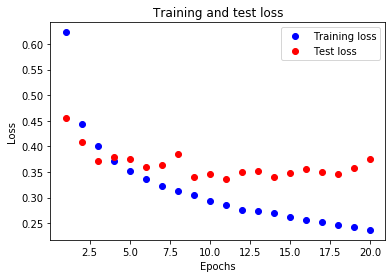

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

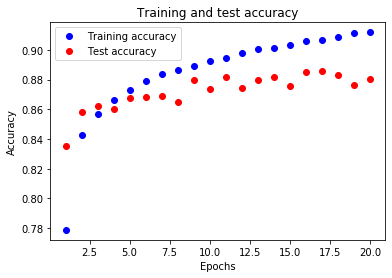

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#This is for the regular fit.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dropout(.275),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 28)                3612      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                290       
Total params: 104,382
Trainable params: 104,382
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.6598 - acc: 0.7693 - val_loss: 0.4480 - val_acc: 0.8362
Epoch 2/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4709 - acc: 0.8325 - val_loss: 0.4152 - val_acc: 0.8512
Epoch 3/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4331 - acc: 0.8468 - val_loss: 0.3954 - val_acc: 0.8559
Epoch 4/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4118 - acc: 0.8536 - val_loss: 0.3790 - val_acc: 0.8645
Epoch 5/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3928 - acc: 0.8597 - val_loss: 0.3738 - val_acc: 0.8656
Epoch 6/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3821 - acc: 0.8633 - val_loss: 0.3605 - val_acc: 0.8678
Epoch 7/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3689 - acc: 0.8680 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3510 - acc: 0.8815
Test accuracy: 0.8815


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

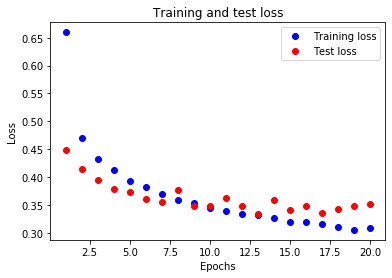

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

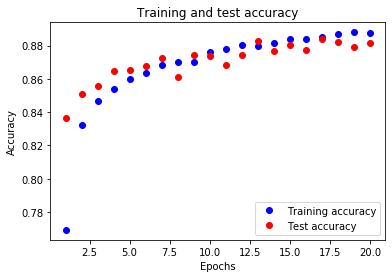

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#This is for the under fit.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(28*28,)),
    #keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(.75),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/sample - loss: 2.1804 - acc: 0.1485 - val_loss: 1.6333 - val_acc: 0.5315
Epoch 2/20
60000/60000 [==============================] - 6s 102us/sample - loss: 1.9860 - acc: 0.2024 - val_loss: 1.5247 - val_acc: 0.5871
Epoch 3/20
60000/60000 [==============================] - 6s 103us/sample - loss: 1.9745 - acc: 0.2024 - val_loss: 1.4816 - val_acc: 0.5963
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 1.9683 - acc: 0.2032 - val_loss: 1.4589 - val_acc: 0.6359
Epoch 5/20
60000/60000 [==============================] - 6s 101us/sample - loss: 1.9622 - acc: 0.2058 - val_loss: 1.4574 - val_acc: 0.6211
Epoch 6/20
60000/60000 [==============================] - 6s 103us/sample - loss: 1.9573 - acc: 0.2051 - val_loss: 1.4781 - val_acc: 0.6213
Epoch 7/20
60000/60000 [==============================] - 6s 102us/sample - loss: 1.9553 - acc: 0.2055 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 1.4519 - acc: 0.6241
Test accuracy: 0.6241


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

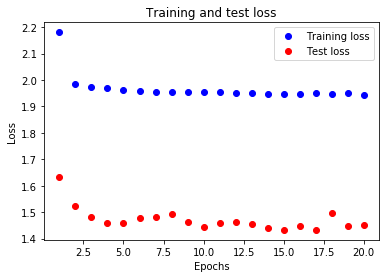

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

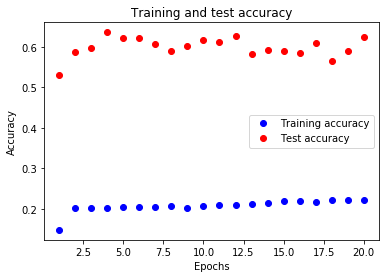

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()